In [1]:
%matplotlib inline


Coding - Decoding simulation of an image
========================================

This example shows a simulation of the transmission of an image as a
binary message through a gaussian white noise channel with an LDPC coding and
decoding system.



In [2]:
# Author: Hicham Janati (hicham.janati@inria.fr)
#
# License: BSD (3-clause)


import numpy as np
from pyldpc import make_ldpc, ldpc_images
from pyldpc.utils_img import gray2bin, rgb2bin
from matplotlib import pyplot as plt
from PIL import Image

from time import time

Let's see the image we are going to be working with



In [4]:
eye = Image.open("data/csdn_img.png")
# convert it to grayscale and keep one channel
eye = np.asarray(eye.convert('LA'))[:, :, 0]

# Convert it to a binary matrix
eye_bin = gray2bin(eye)
print("Eye shape: (%s, %s)" % eye.shape)
print("Binary Eye shape: (%s, %s, %s)" % eye_bin.shape)

n = 200
d_v = 3
d_c = 4
seed = 42

Eye shape: (150, 150)
Binary Eye shape: (150, 150, 8)


First we create a small LDPC code i.e a pair of decoding and coding matrices
H and G. H is a regular parity-check matrix with d_v ones per row
and d_c ones per column



In [5]:
H, G = make_ldpc(n, d_v, d_c, seed=seed, systematic=True, sparse=True)

Now we simulate the transmission with Gaussian white noise
and recover the original image via belief-propagation.



In [6]:
snr = 8
eye_coded, eye_noisy = ldpc_images.encode_img(G, eye_bin, snr, seed=seed)

print("Coded eye shape", eye_coded.shape)

t = time()
eye_decoded = ldpc_images.decode_img(G, H, eye_coded, snr, eye_bin.shape)
t = time() - t
print("Eye | Decoding time: ", t)
error_decoded_eye = abs(eye - eye_decoded).mean()
error_noisy_eye = abs(eye_noisy - eye).mean()

Coded eye shape (200, 3462)
Eye | Decoding time:  0.5038928985595703


In [9]:
eye_coded

array([[-0.80225453,  0.94495599, -0.74215055, ..., -1.466444  ,
        -0.32492056,  1.75532423],
       [ 1.0623809 ,  1.40747489,  1.06978292, ...,  0.74885552,
         1.17212272,  0.71448474],
       [ 0.19090539,  0.47387917, -0.99160283, ..., -0.960194  ,
        -1.13342289,  0.94612247],
       ...,
       [-1.08475796,  1.04446341, -0.71638704, ..., -0.65444707,
         1.50827182, -1.06631947],
       [-0.62963581, -1.23592284, -1.44166992, ..., -1.08595596,
        -0.86091705,  0.74599317],
       [-1.27635857, -1.08224182, -1.21915793, ..., -0.92481316,
         1.37575565,  0.8192141 ]])

With RGB images, we proceed similarly






Tiger shape: (150, 150, 3)
Tiger Binary shape: (150, 150, 24)
Coded Tiger shape (200, 10385)


/home/charles/miniconda3/lib/python3.8/site-packages/pyldpc/decoder.py:62: UserWarning: Decoding stopped before convergence. You may want
                       to increase maxiter
  warnings.warn("""Decoding stopped before convergence. You may want


Tiger | Decoding time:  105.78402900695801


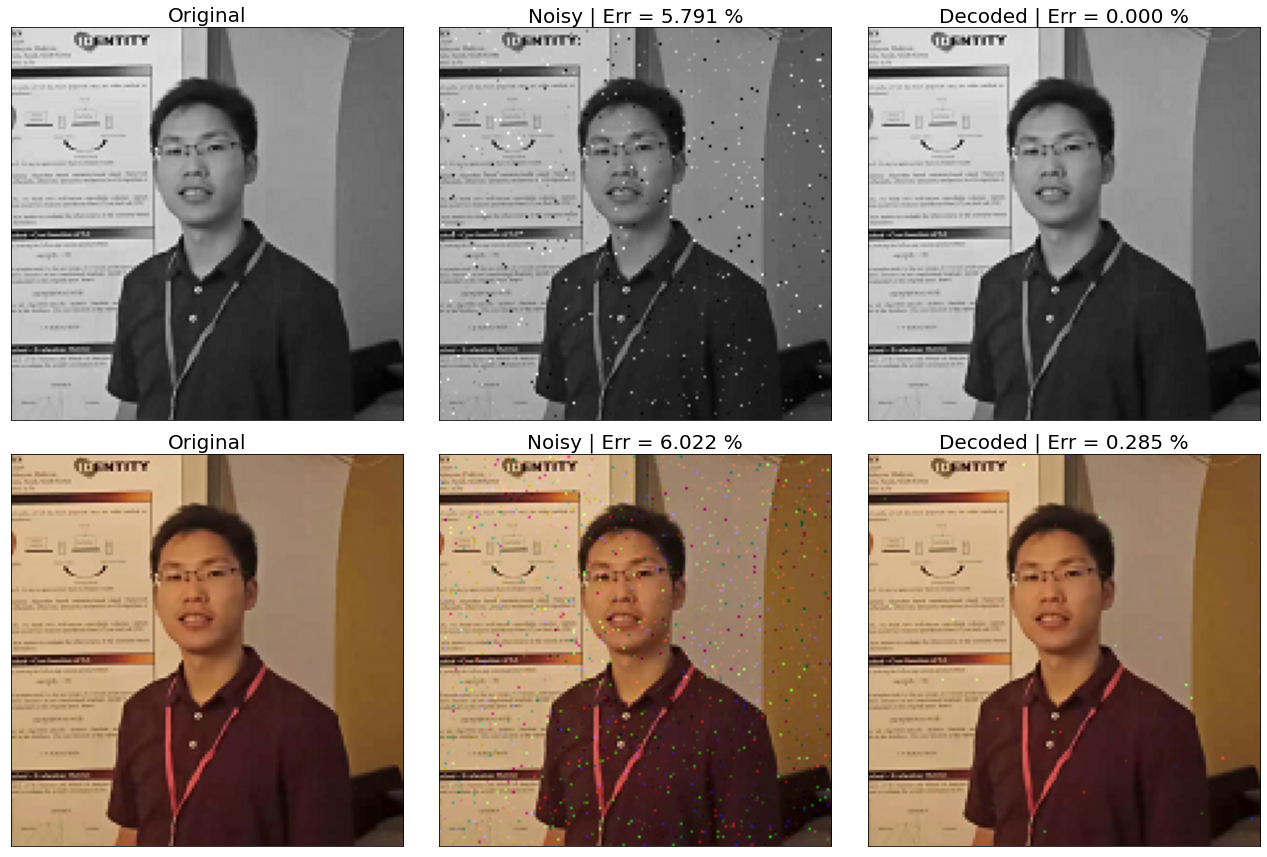

In [12]:
print("\n\n")
tiger = np.asarray(Image.open("data/csdn_img.png"))
# Convert it to a binary matrix
tiger_bin = rgb2bin(tiger)
print("Tiger shape: (%s, %s, %s)" % tiger.shape)
print("Tiger Binary shape: (%s, %s, %s)" % tiger_bin.shape)


tiger_coded, tiger_noisy = ldpc_images.encode_img(G, tiger_bin, snr, seed=seed)
tiger_coded = tiger_coded.astype(int)
print("Coded Tiger shape", tiger_coded.shape)

t = time()
tiger_decoded = ldpc_images.decode_img(G, H, tiger_coded, snr, tiger_bin.shape)
t = time() - t
print("Tiger | Decoding time: ", t)

error_decoded_tiger = abs(tiger - tiger_decoded).mean()
error_noisy_tiger = abs(tiger_noisy - tiger).mean()


titles_eye = ["Original", "Noisy | Err = %.3f %%" % error_noisy_eye,
              "Decoded | Err = %.3f %%" % error_decoded_eye]
titles_tiger = ["Original", "Noisy | Err = %.3f %%" % error_noisy_tiger,
                "Decoded | Err = %.3f %%" % error_decoded_tiger]
all_imgs = [[eye, eye_noisy, eye_decoded], [tiger, tiger_noisy, tiger_decoded]]
f, axes = plt.subplots(2, 3, figsize=(18, 12))
for ax_row, titles, img_list, cmap in zip(axes, [titles_eye, titles_tiger],
                                          all_imgs, ["gray", None]):
    for ax, data, title in zip(ax_row, img_list, titles):
        ax.imshow(data, cmap=cmap)
        ax.set_title(title, fontsize=20)
        ax.set_xticks([])
        ax.set_yticks([])
plt.tight_layout()
plt.show()

In [11]:
tiger_coded.astype(int)

array([[ 0, -1,  1, ...,  0,  1,  0],
       [ 0, -1,  0, ...,  0,  0, -1],
       [ 0,  0,  0, ...,  0,  1,  0],
       ...,
       [-1, -1,  0, ...,  1,  0, -1],
       [ 0,  0, -1, ...,  0,  0,  0],
       [ 1, -1,  0, ...,  1,  1,  0]])